#  LabTest: ML model deployment



ปรับแต่งโค้ดที่ให้มาเพื่อสร้างโมเดล และ Deploy บน Streamlit


 ส่ง
- LabTest-66130700307.ipynb
- model_penguin_66130700307.pkl
- app_predict_penguin_66130700307.py
- LabTest-66130700307.pdf


## Import Packages

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import pickle


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
cd '/content/drive/MyDrive/Colab_Notebooks/LabTest-AI_Workshop'

/content/drive/MyDrive/Colab_Notebooks/LabTest-AI_Workshop


In [4]:
ls

LabTest-66130700307.docx  LabTest-66130700307.ipynb  penguins_size.csv


## Prepare Data

In [6]:
df_org = pd.read_csv("penguins_size.csv")
df_org.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Handle Missing Data

In [7]:
df = df_org.copy()
df.isna().sum()/len(df)*100

,0
species,0.000000
island,0.000000
culmen_length_mm,0.581395
culmen_depth_mm,0.581395
flipper_length_mm,0.581395
body_mass_g,0.581395
sex,2.906977


In [8]:
df= df.dropna(subset = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g'])
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['sex'] = df['sex'].replace(to_replace='.', value = df['sex'].mode()[0])

<ipython-input-8-101aad2f3e67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
<ipython-input-8-101aad2f3e67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].replace(to_replace='.', value = df['sex'].mode()[0])


In [9]:
df.isna().sum()/len(df)*100

,0
species,0.0
island,0.0
culmen_length_mm,0.0
culmen_depth_mm,0.0
flipper_length_mm,0.0
body_mass_g,0.0
sex,0.0


## Categotical Encoding

In [10]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [11]:
df['species'].unique()
# df['island'].unique()
# df['sex'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [12]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [13]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [14]:
#Encoding the object columns.
from sklearn.preprocessing import LabelEncoder

# species_encoder = LabelEncoder().fit(['Adelie', 'Chinstrap', 'Gentoo'])
species_encoder = LabelEncoder().fit(df['species'])

# island_encoder = LabelEncoder().fit(['Torgersen', 'Biscoe', 'Dream'])
island_encoder = LabelEncoder().fit(df['island'])

# sex_encoder = LabelEncoder().fit(['MALE', 'FEMALE'])
sex_encoder = LabelEncoder().fit(df['sex'])


In [15]:
species_encoder.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [16]:
# Apply the encoders to the respective columns
df['species'] = species_encoder.transform(df['species'])
df['island'] = island_encoder.transform(df['island'])
df['sex'] = sex_encoder.transform(df['sex'])

print(df.head())

   species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        0       2              39.1             18.7              181.0   
1        0       2              39.5             17.4              186.0   
2        0       2              40.3             18.0              195.0   
4        0       2              36.7             19.3              193.0   
5        0       2              39.3             20.6              190.0   

   body_mass_g  sex  
0       3750.0    1  
1       3800.0    0  
2       3250.0    0  
4       3450.0    0  
5       3650.0    1  


## Train/Test Data Split

In [17]:
X = df.drop('species', axis=1)
y = df['species']

In [18]:
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1


In [19]:
y.head()

,species
0,0
1,0
2,0
4,0
5,0


In [20]:
# Split data into features and target
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training / Create Model using XXX Alg

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier # Corrected the typo here
# Define the pipeline
model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('classifier', RandomForestClassifier(n_estimators=100))  # You can replace this with any other classifier
])

# Fit the pipeline
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

## Testing / Evaluation

              precision    recall  f1-score   support

           0     1.0000    0.9714    0.9855        35
           1     0.9231    1.0000    0.9600        12
           2     1.0000    1.0000    1.0000        22

    accuracy                         0.9855        69
   macro avg     0.9744    0.9905    0.9818        69
weighted avg     0.9866    0.9855    0.9857        69



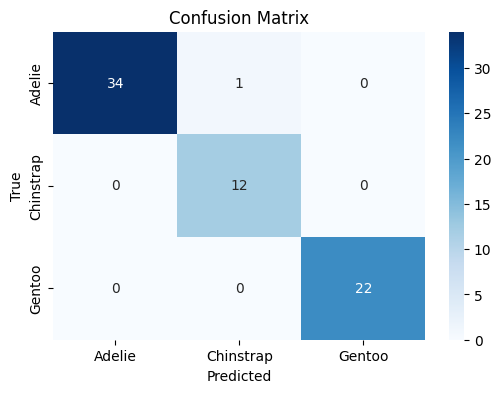

In [22]:
# Make predictions
y_pred = model.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_encoder.inverse_transform(model.named_steps['classifier'].classes_),
            yticklabels=species_encoder.inverse_transform(model.named_steps['classifier'].classes_))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_knn.png')

plt.show()

## Save Model and etc.

In [23]:
# Create a tuple or any container object with your variables
data_to_save = (model, species_encoder, island_encoder ,sex_encoder)

# Open a file in binary write mode
with open('model_penguin_66130700307.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

## Load Model and Prediction

Kernel -> Restart Kernel..

In [24]:
import pickle
import pandas as pd

In [25]:

with open('model_penguin_66130700307.pkl', 'rb') as file:
    # Load the data from the file
    model, species_encoder, island_encoder ,sex_encoder = pickle.load(file)

### New data

In [26]:
x_new =  pd.DataFrame()
x_new['island'] = ['Torgersen']
x_new['culmen_length_mm'] = [37.0]
x_new['culmen_depth_mm'] = [19.3]
x_new['flipper_length_mm'] = [192.3]
x_new['body_mass_g'] = [3750]
x_new['sex'] = ['MALE']


### Categorical Data Encoding

In [27]:
x_new['island'] = island_encoder.transform(x_new['island'])
x_new['sex'] = sex_encoder.transform(x_new['sex'])


### Predicting

In [28]:
y_pred_new = model.predict(x_new)

result = species_encoder.inverse_transform(y_pred_new)

print('Predicted Specie: ', result)

Predicted Specie:  ['Adelie']


### Create app_predict_knn_penguin.py for Running with streamlit

https://docs.streamlit.io/library/api-reference

streamlit run app_predict_randomforest_penguin.py

In [33]:
%%writefile app_predict_penguin_66130700307.py

import streamlit as st
import pandas as pd
import pickle

# Load the trained model
with open('model_penguin_66130700307.pkl', 'rb') as file:
    model = pickle.load(file)

# Title of the app
st.title('Predict Randomforest Penguin App')

# Input fields for user to enter data
island = st.selectbox('Select island :', ['Torgersen', 'Biscoe', 'Dream'])
culmen_length_mm = st.number_input('Enter Culmen Length (mm):')
culmen_depth_mm = st.number_input('Enter Culmen Depth (mm):')
flipper_length_mm = st.number_input('Enter Flipper length (mm):')
body_mass_g = st.number_input('Enter Body Mass (g):')
sex = st.selectbox('Select sex :', ['Male','Female'])

# Create a DataFrame for the input
input_data = pd.DataFrame({
    'island': [island],
    'culmen_length_mm': [culmen_length_mm],
    'culmen_depth_mm': [culmen_depth_mm],
    'flipper_length_mm': [flipper_length_mm],
    'body_mass_g': [body_mass_g],
    'sex': [sex]
})

# Make prediction
if st.button('Predict'):
    prediction = model.predict(input_data)
    result = species_encoder.inverse_transform(prediction)
    st.write(f'Predicted Specie: {round(result)}')



Overwriting app_predict_penguin_66130700307.py


## Deploy on Streamlit Sharing

https://share.streamlit.io/

https://github.com/



In [31]:
%%writefile requirements.txt

scikit-learn
pandas



Overwriting requirements.txt
